# Aula 12 - Redes Perceptron com Sklearn - Parte 2

Vamos utilizar o [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) para modelar Redes Neruais baseadas no Perceptron

In [126]:
# Apenas para evitar warnings 
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas de Data Science
import pandas as pd
import seaborn as sns 

# Separação dos dados
from sklearn.model_selection import train_test_split

# Padronização dos dados
from sklearn.preprocessing import StandardScaler

# Modelos a serem utilizados
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Métricas de avaliação
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 

## Case 1: classificação (Iris Dataset) 

### Leitura do dataset e preparação do Pandas

In [85]:
from sklearn.datasets import load_iris
iris = load_iris()

# Transformando em Dataframe Pandas: 
#   - os dados são iris.data
#   - as colunas são os nomes das características
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data["class"] = iris.target # as classes são os targets do dataset

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Dividindo os dados em TREINO e TESTE

In [86]:
X = data.drop(columns=["class"])  # As features são todos os dados, exceto os labels
y = data["class"]                 # Os labels são as classes que queremos classificar automaticamente

# Divisão de treino e teste, sendo 20% das amostras para teste
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

### Padronização dos dados 

In [87]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Uso dos modelos 

Perceptron e Multi-layer Perceptron (MLP).

In [102]:
def gera_modelos(x_train, x_test, y_train, y_test):

    # Perceptron
    perceptron = Perceptron(random_state=42)
    perceptron.fit(x_train, y_train)

    # Salva as predições do TESTE na variável y_pred
    y_pred = perceptron.predict(x_test)

    # Calcula a acurácia deste perceptron, por meio dos valores preditos para o teste
    # e os valores reais 
    print(f"ACC Perceptron: {round(accuracy_score(y_pred, y_test), 2)}")

    # Matriz de confusão do perceptron
    plot_confusion_matrix(perceptron, x_test, y_test, cmap="Blues");
    
    
    # Arquitetura MLP
    mlp = MLPClassifier(hidden_layer_sizes=(5,), 
                        random_state=1, 
                        max_iter=50)
    
    mlp.fit(x_train, y_train)
    print(f"ACC MLP: {round(accuracy_score(mlp.predict(x_test), y_test), 2)}")
    plot_confusion_matrix(mlp, x_test, y_test, cmap='Blues');

ACC Perceptron: 0.63
ACC MLP: 0.3


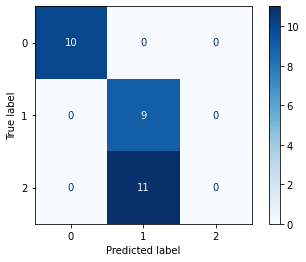

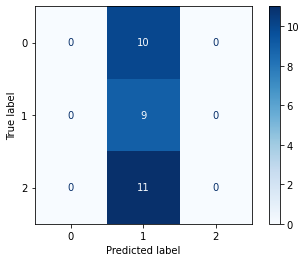

In [89]:
# Dados brutos
gera_modelos(x_train, x_test, y_train, y_test)

ACC Perceptron: 0.93
ACC MLP: 0.5


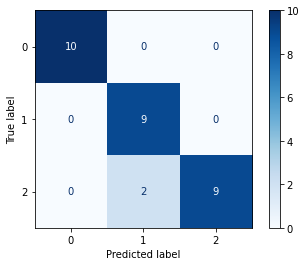

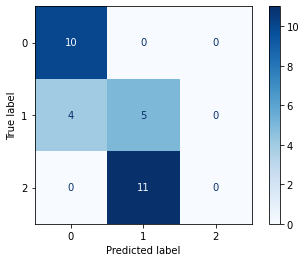

In [90]:
# Dados padronizados
gera_modelos(x_train_scaled, x_test_scaled, y_train, y_test)

## Case 2: regressão (Boston house-prices dataset) 

### Leitura do dataset e preparação do Pandas

In [121]:
from sklearn.datasets import load_boston

# Transformando em Dataframe Pandas: 
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data["label"] = boston.target 

data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Dividindo os dados em TREINO e TESTE

In [122]:
X = data.drop(columns=["label"])  # As features são todos os dados, exceto os labels
y = data["label"]                 # Os labels são as classes que queremos classificar automaticamente

# Divisão de treino e teste, sendo 20% das amostras para teste
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

### Modelo SEM padronizar os dados

In [132]:
mlp = MLPRegressor(hidden_layer_sizes=(5,), 
                   random_state=1, 
                   max_iter=50)
mlp.fit(x_train, y_train)
print(f"MSE: {round(mean_squared_error(mlp.predict(x_test), y_test), 2)}")
print(f"MAE: {round(mean_absolute_error(mlp.predict(x_test), y_test), 2)}")


MSE: 9743.29
MAE: 91.65


### Modelo COM dados padronizados

In [124]:
# Padroniza os dados
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [133]:
# Cria o modelo
mlp = MLPRegressor(hidden_layer_sizes=(5,), 
                   random_state=1, 
                   max_iter=50)
mlp.fit(x_train_scaled, y_train)
print(f"MSE: {round(mean_squared_error(mlp.predict(x_test_scaled), y_test), 2)}")
print(f"MAE: {round(mean_absolute_error(mlp.predict(x_test_scaled), y_test), 2)}")


MSE: 522.54
MAE: 21.25
